# Chapter 2: Working with data

In [1]:
import rpy2.robjects as robjects

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext rpy2.ipython

## Table 2.1

In [2]:
classData = pd.DataFrame({'why': ["It fulfills a degree plan requirement",
                           "It fulfills a General Education Breadth Requirement",
                           "It is not required but I am interested in the topic",
                           "Other"],
                         'nResponses': [105,32,11,4]})
classData

,why,nResponses
0,It fulfills a degree plan requirement,105
1,It fulfills a General Education Breadth Requir...,32
2,It is not required but I am interested in the ...,11
3,Other,4


## Figure 2.1

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


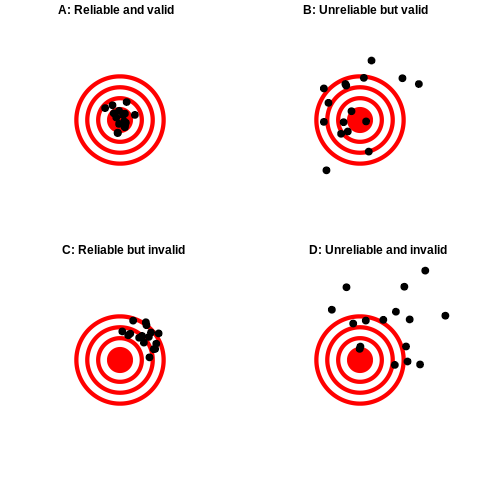

In [4]:
%%R

library(tidyverse)
library(cowplot)

# Figure inspired by https://commons.wikimedia.org/wiki/File:Reliability_and_validity.svg

# from https://stackoverflow.com/questions/6862742/draw-a-circle-with-ggplot2

set.seed(12345)
gg_circle <- function(r, xc, yc, color="black", fill=NA, ...) {
    x <- xc + r*cos(seq(0, pi, length.out=100))
    ymax <- yc + r*sin(seq(0, pi, length.out=100))
    ymin <- yc + r*sin(seq(0, -pi, length.out=100))
    annotate("ribbon", x=x, ymin=ymin, ymax=ymax, color=color, fill=fill, ...)
}


npoints <- 16
rel_mult <- 0.75
unrel_mult <- 2.5

plotDf <- tibble(
  X_RelVal = rnorm(npoints)*rel_mult,
  Y_RelVal = rnorm(npoints)*rel_mult,
  X_RelInval = rnorm(npoints)*rel_mult+2,
  Y_RelInval = rnorm(npoints)*rel_mult+2,
  X_UnrelInval = rnorm(npoints)*unrel_mult+2,
  Y_UnrelInval = rnorm(npoints)*unrel_mult+2,
  X_UnrelVal = rnorm(npoints)*unrel_mult,
  Y_UnrelVal = rnorm(npoints)*unrel_mult
)

pointsize <- 3
linesize=2
p1=ggplot(plotDf,aes(X_RelVal,Y_RelVal)) +
  gg_circle(r=4, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=3, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=2, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=1, xc=0.0, yc=0.0,size=linesize,color='red',fill='red') +
  geom_point(size=pointsize) +
  xlim(-10,10) + ylim(-10,10) +
  theme_void()

p2=ggplot(plotDf,aes(X_UnrelVal,Y_UnrelVal)) +
  gg_circle(r=4, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=3, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=2, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=1, xc=0.0, yc=0.0,size=linesize,color='red',fill='red') +
  geom_point(size=pointsize) +
  xlim(-10,10) + ylim(-10,10) +
  theme_void()

p3=ggplot(plotDf,aes(X_RelInval,Y_RelInval)) +
  gg_circle(r=4, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=3, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=2, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=1, xc=0.0, yc=0.0,size=linesize,color='red',fill='red') +
  geom_point(size=pointsize) +
  xlim(-10,10) + ylim(-10,10) +
  theme_void()

p4=ggplot(plotDf,aes(X_UnrelInval,Y_UnrelInval)) +
  gg_circle(r=4, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=3, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=2, xc=0.0, yc=0.0,size=linesize,color='red') +
  gg_circle(r=1, xc=0.0, yc=0.0,size=linesize,color='red',fill='red') +
  geom_point(size=pointsize) +
  xlim(-10,10) + ylim(-10,10) +
  theme_void()

plot_grid(p1,p2,p3,p4,ncol=2,label_size=12,
          labels=c('A: Reliable and valid',
                   'B: Unreliable but valid',
                   'C: Reliable but invalid',
                   'D: Unreliable and invalid'))

## Table 2.2

In [17]:
measTypes = pd.DataFrame({"Equal/not equal": ['OK','OK','OK','OK'],
                     ">/<": ['','OK','OK','OK'],
                     "+/-": ['','','OK','OK'],
                     "Multiply/divide": ['','','','OK']},
                     index=['Nominal','Ordinal','Interval','Ratio'])
measTypes

,Equal/not equal,>/<,+/-,Multiply/divide
Nominal,OK,,,
Ordinal,OK,OK,,
Interval,OK,OK,OK,
Ratio,OK,OK,OK,OK
